# 연습문제
1. 수집된 데이터 확인하시고
2. 데이터 시각화
3. 분별력 없는 데이터 삭제
4. 데이터 나누기
    * 80%는 학습데이터, 20%는 테스트 데이터
5. 학습 데이터와 테스트 데이터 개수를 확인하세요.
6. 모델을 knn 모델을 학습 시키고,
7. 예측 정확도를 출력하세요.
8. 정답과 예측값을 데이터 프레임으로 출력해 보세요.

=========================================================
속성 설명
=========================================
* Player : 이름
* Pos: 플레이어의 포지션을 나타냅니다. 'SG' 는 '슈팅가드' 'C'는 '센터'를 의미
* 3P : 3점슛 성공 횟수
* 2P : 2점슛 성공 횟수
* TRB: 리바운드 성공 횟수
* AST: 어시스트 성공 횟수
* STL: 스틸 성공 횟수
* BLK: 블로킹 성공 횟수

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

array([[<Axes: xlabel='3P', ylabel='3P'>,
        <Axes: xlabel='2P', ylabel='3P'>,
        <Axes: xlabel='TRB', ylabel='3P'>,
        <Axes: xlabel='AST', ylabel='3P'>,
        <Axes: xlabel='STL', ylabel='3P'>,
        <Axes: xlabel='BLK', ylabel='3P'>],
       [<Axes: xlabel='3P', ylabel='2P'>,
        <Axes: xlabel='2P', ylabel='2P'>,
        <Axes: xlabel='TRB', ylabel='2P'>,
        <Axes: xlabel='AST', ylabel='2P'>,
        <Axes: xlabel='STL', ylabel='2P'>,
        <Axes: xlabel='BLK', ylabel='2P'>],
       [<Axes: xlabel='3P', ylabel='TRB'>,
        <Axes: xlabel='2P', ylabel='TRB'>,
        <Axes: xlabel='TRB', ylabel='TRB'>,
        <Axes: xlabel='AST', ylabel='TRB'>,
        <Axes: xlabel='STL', ylabel='TRB'>,
        <Axes: xlabel='BLK', ylabel='TRB'>],
       [<Axes: xlabel='3P', ylabel='AST'>,
        <Axes: xlabel='2P', ylabel='AST'>,
        <Axes: xlabel='TRB', ylabel='AST'>,
        <Axes: xlabel='AST', ylabel='AST'>,
        <Axes: xlabel='STL', ylabel='AST'>,
     

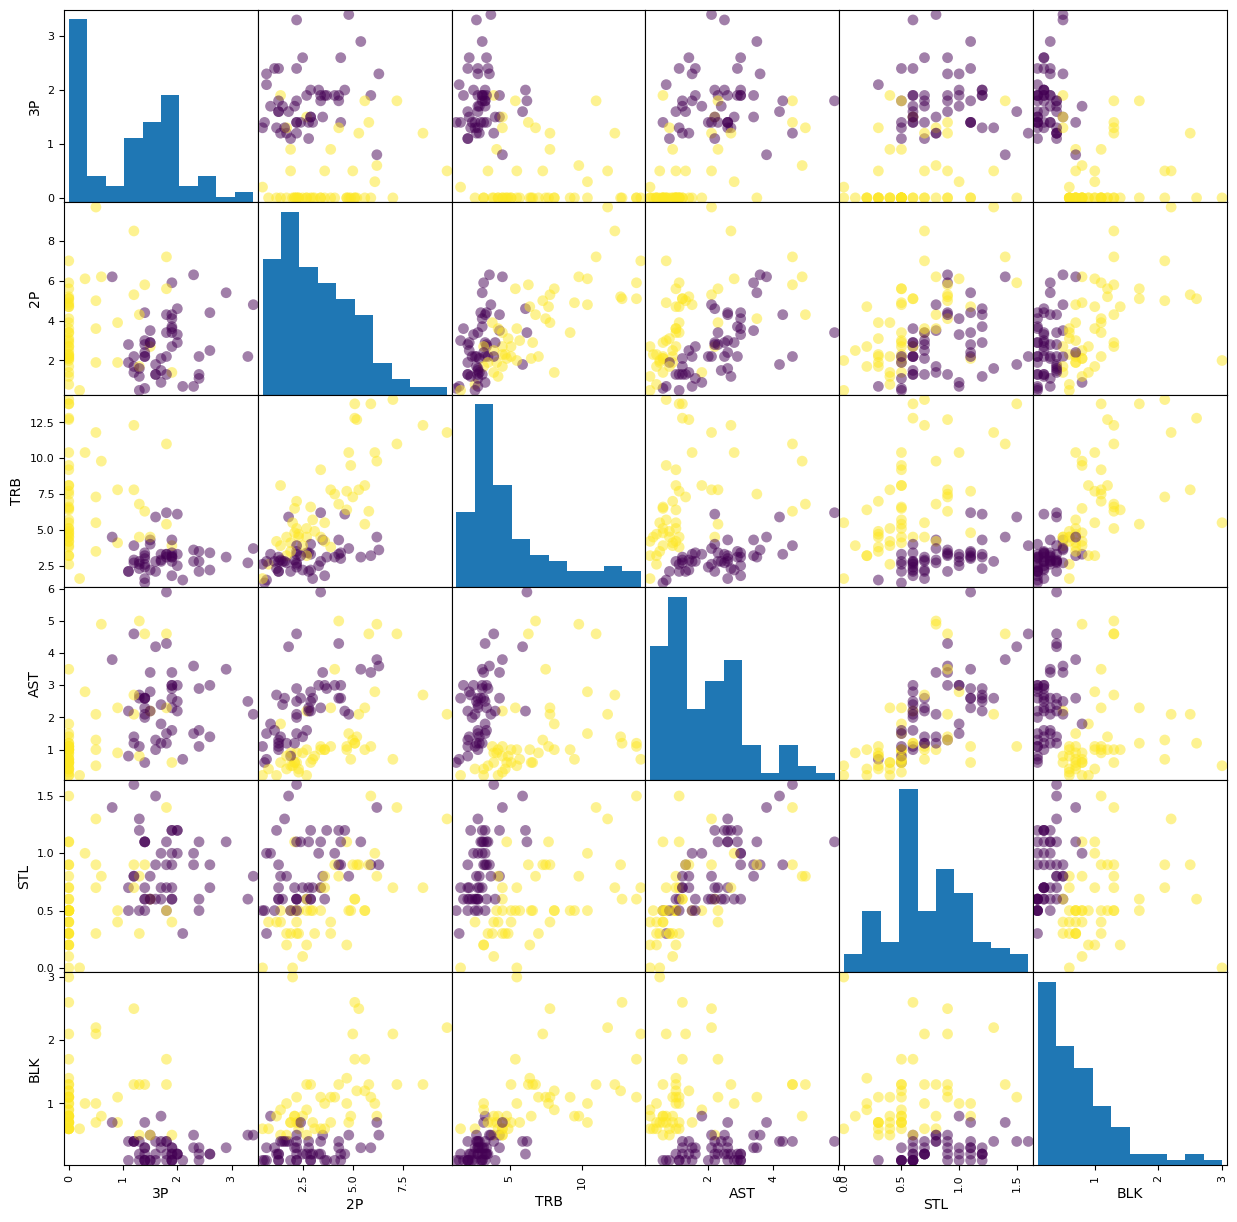

In [2]:
df = pd.read_csv('../data/ball.csv')
# SG -> 0, C -> 1
df['Pos'] = df['Pos'].apply(lambda x:0 if x == 'SG' else 1)
pd.plotting.scatter_matrix(df.drop('Pos',axis=1), c=df['Pos'],figsize=(15,15),
                           marker='o',s=60, alpha=.5)


In [3]:
y = df['Pos']
X = df.drop(['Pos','Player'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
# 0 -> SG, 1 -> C
pd.DataFrame({'예측값':y_pred,'실제값':y_test}).applymap(
    lambda x: 'SG' if x == 0 else 'C')

0.9875
0.95


,예측값,실제값
22,SG,SG
39,SG,SG
85,C,C
97,SG,SG
55,SG,SG
33,C,C
80,SG,SG
13,C,SG
27,C,C
96,SG,SG


# 내코드

In [4]:
dataset = pd.read_csv('../data/ball.csv')
dataset.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [5]:
df = dataset.iloc[:,1:]
df['Pos'] = df['Pos'].replace(['SG', 'C'], [0,1])     #df['Pos'] 에서 SG => 0, C=>1 바꿈

In [6]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df['Pos']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 42)

array([[<Axes: xlabel='Pos', ylabel='Pos'>,
        <Axes: xlabel='3P', ylabel='Pos'>,
        <Axes: xlabel='2P', ylabel='Pos'>,
        <Axes: xlabel='TRB', ylabel='Pos'>,
        <Axes: xlabel='AST', ylabel='Pos'>,
        <Axes: xlabel='STL', ylabel='Pos'>,
        <Axes: xlabel='BLK', ylabel='Pos'>],
       [<Axes: xlabel='Pos', ylabel='3P'>,
        <Axes: xlabel='3P', ylabel='3P'>,
        <Axes: xlabel='2P', ylabel='3P'>,
        <Axes: xlabel='TRB', ylabel='3P'>,
        <Axes: xlabel='AST', ylabel='3P'>,
        <Axes: xlabel='STL', ylabel='3P'>,
        <Axes: xlabel='BLK', ylabel='3P'>],
       [<Axes: xlabel='Pos', ylabel='2P'>,
        <Axes: xlabel='3P', ylabel='2P'>,
        <Axes: xlabel='2P', ylabel='2P'>,
        <Axes: xlabel='TRB', ylabel='2P'>,
        <Axes: xlabel='AST', ylabel='2P'>,
        <Axes: xlabel='STL', ylabel='2P'>,
        <Axes: xlabel='BLK', ylabel='2P'>],
       [<Axes: xlabel='Pos', ylabel='TRB'>,
        <Axes: xlabel='3P', ylabel='TRB'>,
      

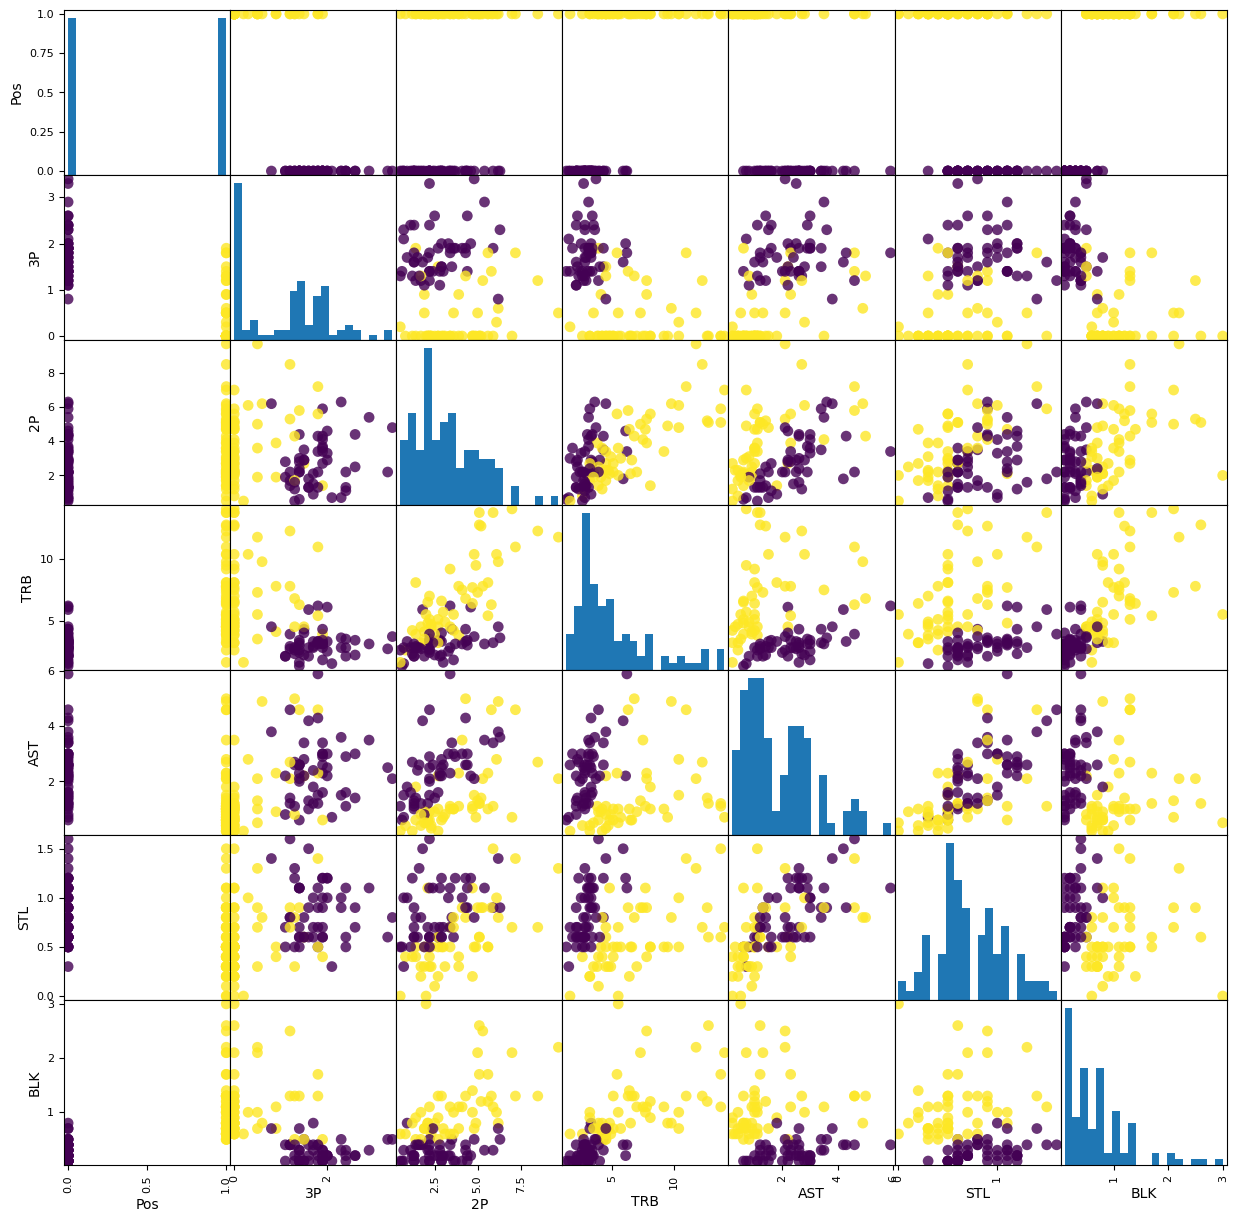

In [7]:
pd.plotting.scatter_matrix(df, c = y, figsize = (15,15), marker = 'o', hist_kwds = {'bins':20}, s = 60, alpha = .8)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape     #학습데이터는 80개, 테스트데이터는 20개

((80, 6), (80,), (20, 6), (20,))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [11]:
print('정확도: {:.4f}%'.format(knn.score(X_test, y_test)*100 ))

정확도: 100.0000%


In [12]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [13]:
y_pred == y_test

83    True
53    True
70    True
45    True
44    True
39    True
22    True
80    True
10    True
0     True
18    True
30    True
73    True
33    True
90    True
4     True
76    True
77    True
12    True
31    True
Name: Pos, dtype: bool

In [14]:
result = pd.DataFrame({'예측': y_pred, '원본': y_test})
result.replace([0,1],['SG', 'C'], inplace = True)

In [15]:
result

,예측,원본
83,C,C
53,C,C
70,SG,SG
45,SG,SG
44,C,C
39,SG,SG
22,SG,SG
80,SG,SG
10,C,C
0,SG,SG


# 다른코드

In [16]:
rawdata = pd.read_csv('../data/ball.csv')

In [17]:
# x축 데이터 분류
data = rawdata.iloc[:,2:8]
data = data.to_numpy()
data[:5]

array([[1.4, 0.6, 1.3, 0.6, 0.5, 0.1],
       [0. , 4.7, 7.7, 1.1, 1.1, 1. ],
       [0. , 2.3, 4.5, 0.3, 0.5, 0.6],
       [0. , 0.8, 2.6, 0.4, 0.4, 0.6],
       [1.5, 3.5, 4.3, 3.4, 0.8, 0.5]])

In [18]:
# y축 데이터 분류 (C:1, SG:0)
rawpositions = list(rawdata['Pos'])
positions = np.array([1 if position == 'C' else 0 for position in rawpositions])
positions

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0])

In [19]:
# train test split (test size as 0.20 )
x_train, x_test, y_train, y_test = train_test_split(data, positions, test_size = 0.20, random_state = 0)

In [20]:
# 데이터 갯수 확인
print(x_train.shape)
print(x_test.shape)

(80, 6)
(20, 6)


In [21]:
# score가 제일 제일 높은 neighbor num 찾기
for num in range(1,21):
    knn = KNeighborsClassifier(num)
    knn.fit(x_train, y_train)
    print(num, ' ', knn.score(x_test, y_test))

1   0.9
2   0.85
3   0.9
4   0.85
5   0.85
6   0.85
7   0.85
8   0.85
9   0.85
10   0.85
11   0.85
12   0.85
13   0.85
14   0.85
15   0.85
16   0.85
17   0.85
18   0.85
19   0.85
20   0.9


In [22]:
# 예측 정확도 출력
knn = KNeighborsClassifier(3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9

In [23]:
prediction = knn.predict(x_test)
actual = y_test

df = pd.DataFrame(list(zip(prediction, actual)), columns = ['예측값', '실제값'])
df['예측값'].replace([0,1], ['SG','C'], inplace = True)
df['실제값'].replace([0,1], ['SG','C'], inplace = True)
df

,예측값,실제값
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,C
9,C,C
